In [287]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
sns.set_style("darkgrid")

In [289]:
reviews = pd.read_csv("data/qatar_reviews.csv")

In [290]:
reviews.sample(5)

,reviews
899,✅ Trip Verified | Cancelled my original fligh...
209,"✅ Trip Verified | Seat 40K, window seat witho..."
1586,✅ Trip Verified | I find Qatar Airways as ple...
332,✅ Trip Verified | Superb airline with superb ...
238,✅ Trip Verified | We flew in Business Class f...


In [291]:
reviews["reviews"].loc[243]

'✅ Trip Verified |  I opted to have food at the Al Mourjan lounge before boarding, and to avoid it on the flight. This allowed me to enjoy the benefit of a good sleep, in the relative comfort of a business class flat bed. I opted for the last minute "on the go breakfast" before landing in Bangkok, proving the same inadequate level of F&B which I now associate with Qatar Airways: 3 or 4 pieces of fruit, a compote of yoghurt with some sugared jam, and a croissant. Harmless enough. Staff as always, very pleasant and willing to help at every opportunity, when required.'

Extracting Verified Trips

In [292]:
def verified(text):
    
    first = [word.split("|")[1] for word in text]
    second = []

    for word in text:
        if "trip" in word.split("|")[0].lower():
            second.append("Yes")
        else:
            second.append("No")
    return first, second

In [293]:
reviews["reviews"], reviews["verified"] = verified(reviews["reviews"])

Q1: How many reviews are from verified trips?

In [294]:
reviews["verified"].value_counts()

Yes    1820
No      180
Name: verified, dtype: int64

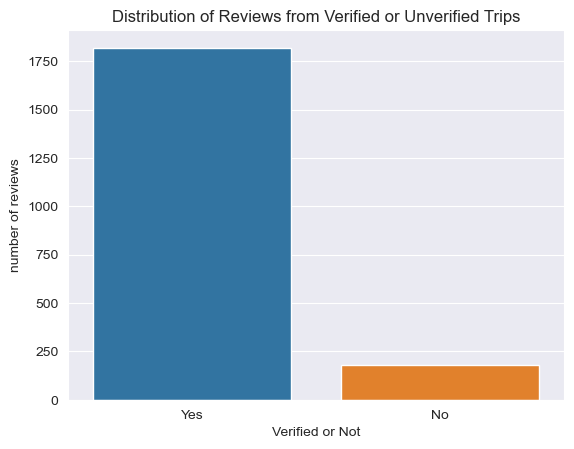

In [295]:
plt.title("Distribution of Reviews from Verified or Unverified Trips")
sns.countplot(x=reviews["verified"])

plt.xlabel("Verified or Not")
plt.ylabel("number of reviews");

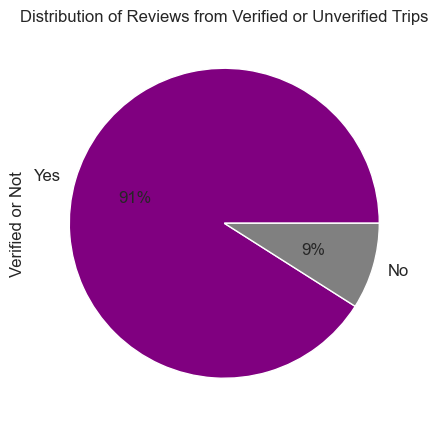

In [296]:
reviews["verified"].value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(5,6), colors=["purple", "gray"])
plt.title("Distribution of Reviews from Verified or Unverified Trips")
plt.ylabel("Verified or Not", size=12);

Data Preprocessing

In [297]:
reviews.drop_duplicates(inplace=True)

In [298]:
import re

In [299]:
reviews["reviews_processed"] = reviews["reviews"].map(lambda x: re.sub("[,\.!?’'()]", "", x.strip()))

In [300]:
reviews["reviews_processed"].sample().values

array(['Superb airline with superb air hostesses Cant do enough and attend to every need with quality service On board meals and entertainment were great also Just need to sort security times at Doha'],
      dtype=object)

In [301]:
import nltk
from nltk.corpus import stopwords

In [302]:
stop_words = stopwords.words("english")
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Q2: What are the most common words?

In [303]:
from wordcloud import WordCloud

In [304]:
combined_words = ",".join(list(reviews["reviews_processed"].values))

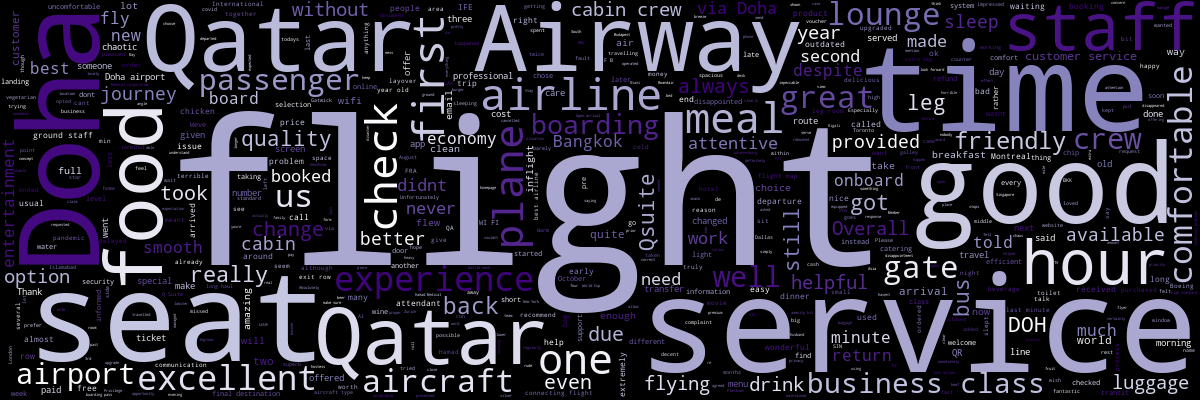

In [305]:
cloud = WordCloud(background_color="black", max_words=3000, contour_width=3, contour_color="steelblue", colormap="Purples_r", width=1200, height=400, random_state=51)
cloud.generate(combined_words)
cloud.to_image()

Q3: What is the distribution of Positive, Neutral, Negative Reviews?

In [306]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [307]:
vader = SentimentIntensityAnalyzer()

In [308]:
# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']
reviews['compound'] = reviews['reviews'].apply(function)

In [310]:
def sentiment(score):
    if score > 0.3:
        return "Positive"
    elif score < -0.3:
        return "Negative"
    else:
        return "Neutral"

reviews["sentiment"] = reviews["compound"].apply(sentiment)

In [311]:
reviews.sample(5)

,reviews,verified,reviews_processed,compound,sentiment
16,SIN to DOH on a Boeing 777. Older aircraft b...,Yes,SIN to DOH on a Boeing 777 Older aircraft but ...,0.9834,Positive
87,Starting from the check-in at Tunis Airport ...,Yes,Starting from the check-in at Tunis Airport Ms...,0.9688,Positive
6,This is simply the best - from beginning to t...,Yes,This is simply the best - from beginning to th...,0.9923,Positive
75,"Flights to BRU-DOH-BKK all well, seats, chec...",Yes,Flights to BRU-DOH-BKK all well seats check-in...,-0.8173,Negative
99,Cancelled my original flight (12h) booked me...,Yes,Cancelled my original flight 12h booked me on ...,0.3384,Positive


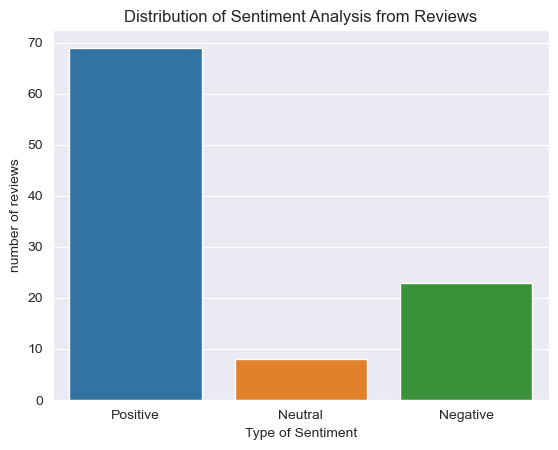

In [312]:
plt.title("Distribution of Sentiment Analysis from Reviews")
sns.countplot(x=reviews["sentiment"])

plt.xlabel("Type of Sentiment")
plt.ylabel("number of reviews");

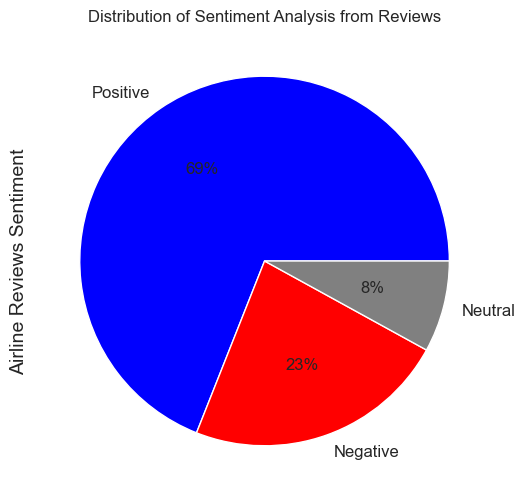

In [313]:
reviews["sentiment"].value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "grey"])
plt.title("Distribution of Sentiment Analysis from Reviews")
plt.ylabel("Airline Reviews Sentiment", size=14);

Q4: What are the most common words from the Positive Reviews?

In [336]:
stop_words.extend(["Qatar", "Airways", "Qatar Airways", "Doha", "Doha airport", "flight", "plane", "via Doha", "airport",
                    "get", "got", "seat", "time", "service", "us", "hour", "seats"])

In [315]:
positive = reviews[reviews["sentiment"] == "Positive"]
positive_words = ",".join(list(positive["reviews_processed"].values))

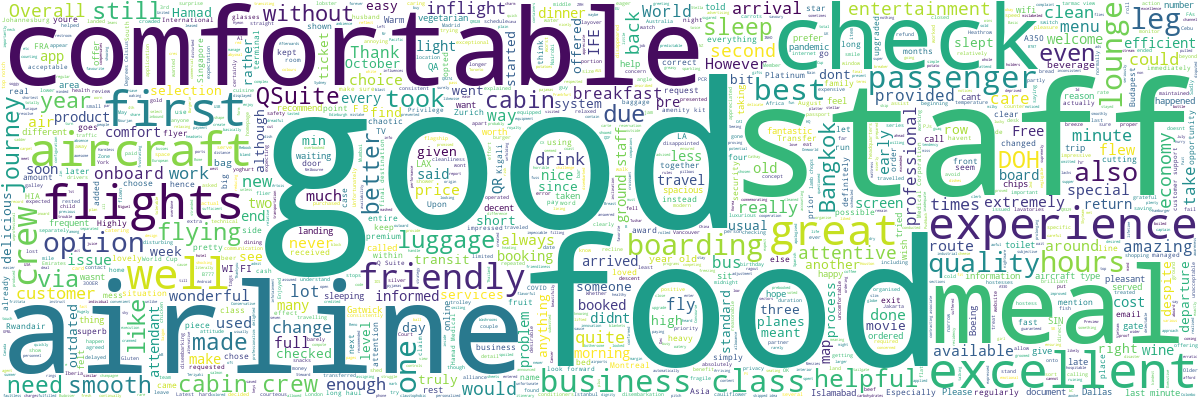

In [337]:
cloud = WordCloud(background_color="white", max_words=3000, contour_width=3, contour_color="steelblue", width=1200, height=400, stopwords=stop_words, random_state=51)
cloud.generate(positive_words)
cloud.to_image()

Q5: What are the most common words from the Neutral Reviews?

In [326]:
neutral = reviews[reviews["sentiment"] == "Neutral"]
neutral_words = ",".join(list(neutral["reviews_processed"].values))

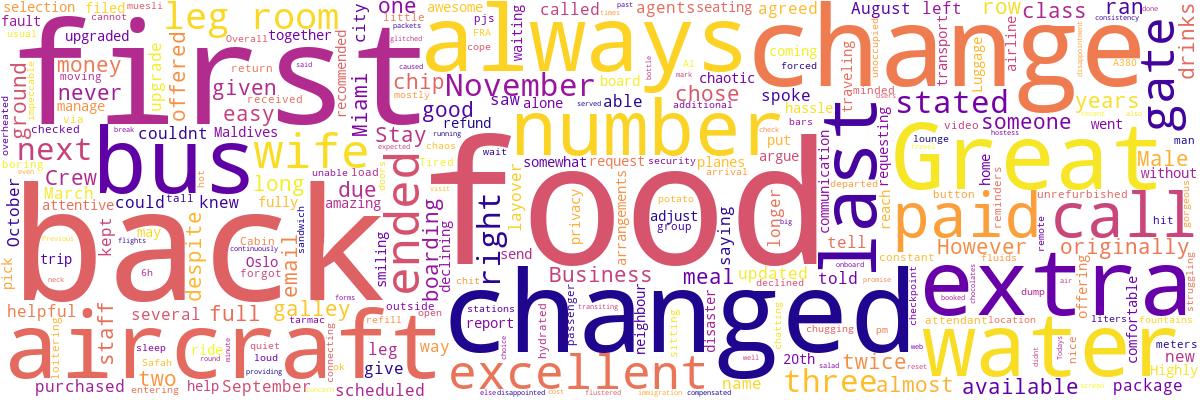

In [338]:
cloud = WordCloud(background_color="white", max_words=3000, contour_width=3, colormap="plasma", contour_color="steelblue", width=1200, height=400, stopwords=stop_words, random_state=51)
cloud.generate(neutral_words)
cloud.to_image()

Q6: What are the most common words from the Negative Reviews?

In [319]:
negative = reviews[reviews["sentiment"] == "Negative"]
negative_words = ",".join(list(negative["reviews_processed"].values))

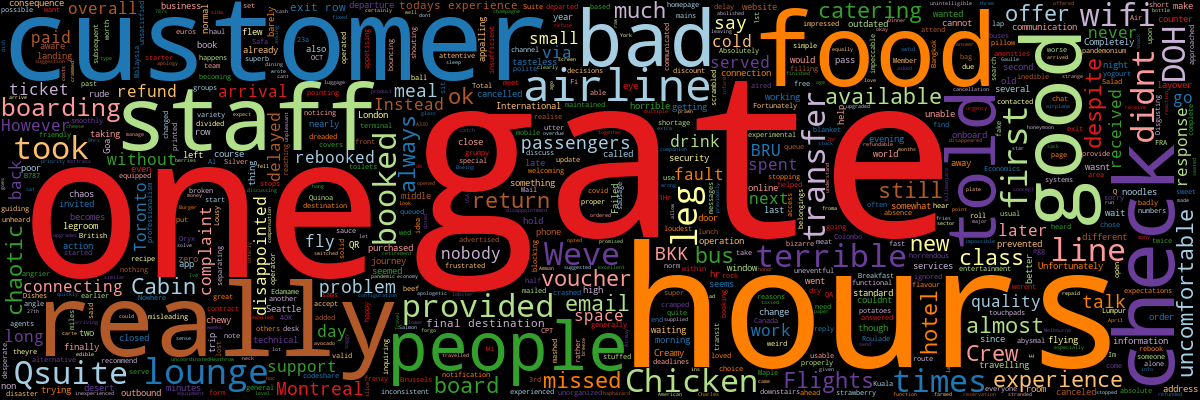

In [339]:
cloud = WordCloud(background_color="black", max_words=3000, contour_width=3, colormap="Paired_r", contour_color="steelblue", width=1200, height=400, stopwords=stop_words, random_state=51)
cloud.generate(negative_words)
cloud.to_image()

Most Positive Review

In [321]:
reviews["compound"].max()

0.996

In [322]:
reviews[reviews["compound"] == reviews["compound"].max()]["reviews"].sample().values

array(['  This is our second time flying with Qatar Airways. We flew LAX to DOH, stayed a few days and then onto CAI and back. From check in to in flight Qatar Airways makes it a truly wonderful experience. The check in at LAX was quick and friendly and don\'t even get me started on the experience of checking in at DOH; offered beverages, sit down and very attentive and friendly. The lounges are so relaxing, good food, drinks, the lounge at DOH has "hotel" rooms in it you can sleep in for a few hours. Service is top notch. Now for the flight. Warm greeting and welcome, Q Suites there are no words just comfortable, easy to sleep well in (I slept 10 hours). The amenity kit bags were colored for Breast Cancer awareness and the PJs for World Cup, awesome. The food was delicious as usual, flavorful, many choices, served at a good temperature and displayed nicely. They do have a new added light meal menu for world cup and it\'s like tailgate food; chips and guaq, potato ball, fish and chips,

Most Negative Review

In [323]:
reviews["compound"].min()

-0.9868

In [324]:
reviews[reviews["compound"] == reviews["compound"].min()]["reviews"].sample().values

array(['  Flights and service were good as usual, with a high standard and service and catering. What is getting really bad is Doha airport. I departed from the dreaded bus gate area downstairs. It seems this becomes the norm now, since almost all my flights this year were bus transfers. It becomes more and more chaotic, but todays experience was really really bad. It was utter chaos with unorganized lines, frustrated and rude gate agents.  The shortage of buses added to the chaos. With this, Doha is miles away from becoming a world class airport.'],
      dtype=object)

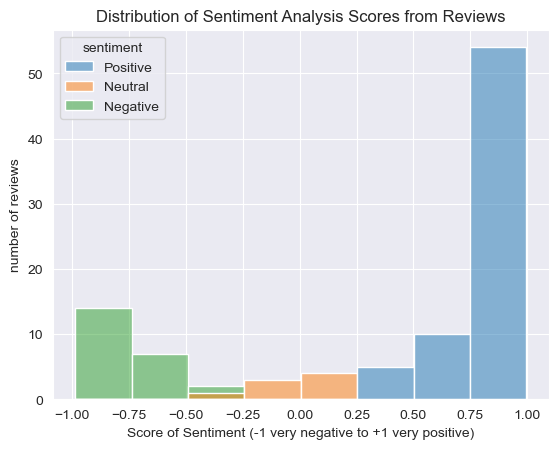

In [325]:
plt.title("Distribution of Sentiment Analysis Scores from Reviews")
sns.histplot(data=reviews, x="compound", hue="sentiment")

plt.xlabel("Score of Sentiment (-1 very negative to +1 very positive)")
plt.ylabel("number of reviews");